In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\anime.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [7]:
print('Number of Unique names are {}'.format(len(df['name'].unique())))

Number of Unique Users are 12292


In [8]:
print('Number of Unique genre are {}'.format(len(df['genre'].unique())))

Number of Unique genre are 3265


In [9]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [10]:
df['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
df.rating.describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [13]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [14]:
df.isnull().any()

anime_id    False
name        False
genre        True
type         True
episodes    False
rating       True
members     False
dtype: bool

In [15]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df[df.duplicated()].shape

(0, 7)

In [18]:
df[df.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [19]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Taka no Tsume 8: Yoshida-kun no X-Files    10.00
Spoon-hime no Swing Kitchen                 9.60
Mogura no Motoro                            9.50
Kimi no Na wa.                              9.37
Kahei no Umi                                9.33
Name: rating, dtype: float64

In [20]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Shi Wan Ge Leng Xiaohua                       2
Saru Kani Gassen                              2
Osomatsu-kun: Iyami wa Hitori Kaze no Naka    1
Oshiri Kajiri Mushi (TV) 3rd Season           1
Oshiri Kajiri Mushi (TV) 4th Season           1
Oshiruko                                      1
Oshizuka ni                                   1
Osiris no Tenbin                              1
Osiris no Tenbin: Season 2                    1
Osomatsu-kun                                  1
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings.head()

,rating
name,
&quot;0&quot;,5.06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06
&quot;Bungaku Shoujo&quot; Memoire,7.54
&quot;Bungaku Shoujo&quot; Movie,7.63


In [22]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,5.06,1
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,1
&quot;Bungaku Shoujo&quot; Memoire,7.54,1
&quot;Bungaku Shoujo&quot; Movie,7.63,1


<Axes: >

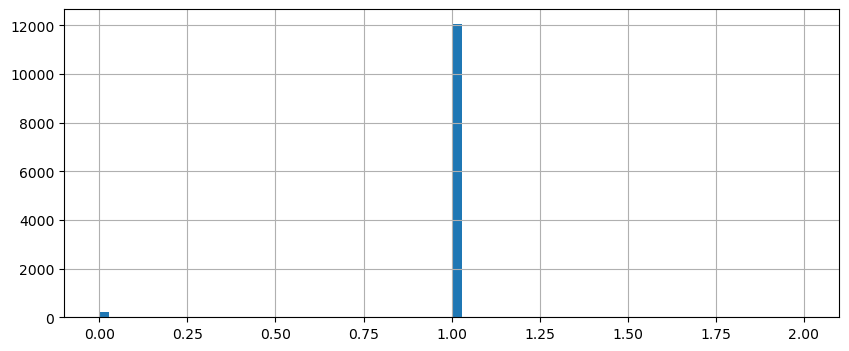

In [23]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

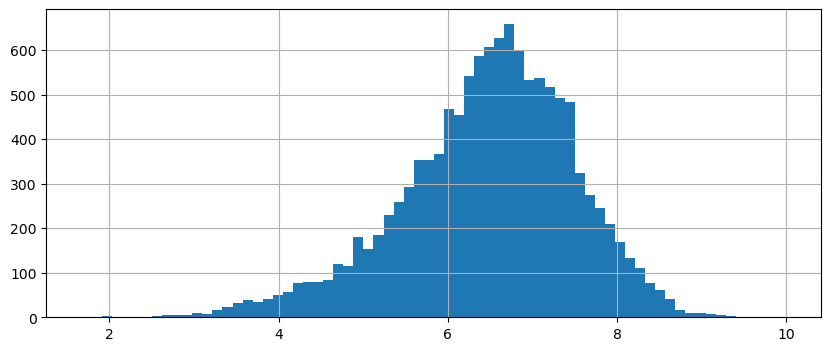

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

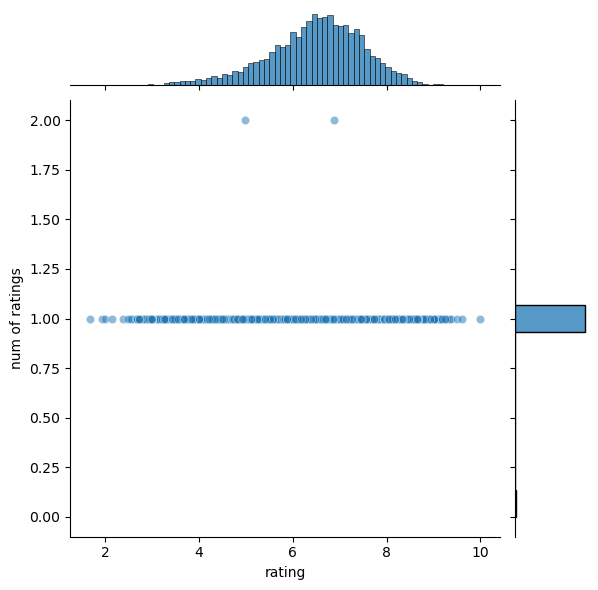

In [25]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Text(0.5, 1.0, 'Ratings Frequency')

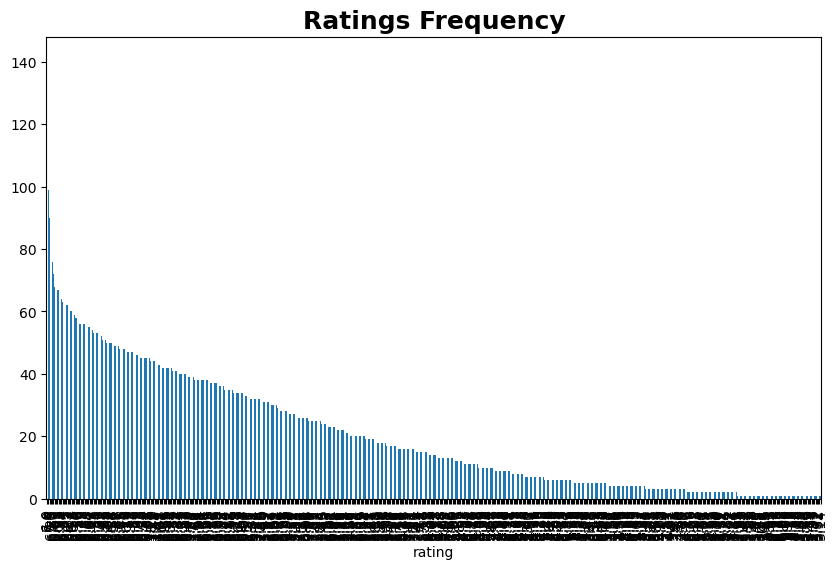

In [27]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 18, fontweight = 'bold')

In [28]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [29]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Shi Wan Ge Leng Xiaohua,6.87,2
Saru Kani Gassen,4.99,2
Osomatsu-kun: Iyami wa Hitori Kaze no Naka,6.40,1
Oshiri Kajiri Mushi (TV) 3rd Season,5.48,1
Oshiri Kajiri Mushi (TV) 4th Season,5.58,1
Oshiruko,5.16,1
Oshizuka ni,4.08,1
Osiris no Tenbin,6.06,1
Osiris no Tenbin: Season 2,6.08,1


In [33]:
user_anime_df = df.pivot_table(index='anime_id',columns = 'name', values = 'rating').fillna(0)
user_anime_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [35]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Shi Wan Ge Leng Xiaohua,6.87,2
Saru Kani Gassen,4.99,2
Osomatsu-kun: Iyami wa Hitori Kaze no Naka,6.40,1
Oshiri Kajiri Mushi (TV) 3rd Season,5.48,1
Oshiri Kajiri Mushi (TV) 4th Season,5.58,1
Oshiruko,5.16,1
Oshizuka ni,4.08,1
Osiris no Tenbin,6.06,1
Osiris no Tenbin: Season 2,6.08,1
